In [1]:
from qiskit import __version__
print(__version__)

1.3.1


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

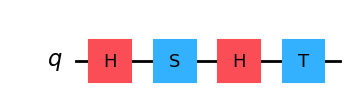

In [5]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

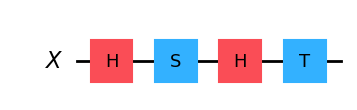

In [6]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

In [7]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

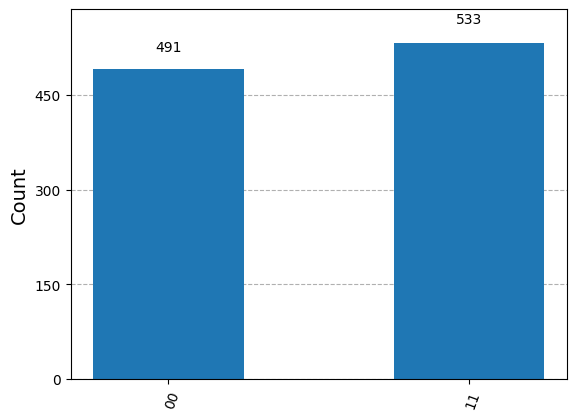

In [8]:
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)  # Shows ~50% |00⟩ and ~50% |11⟩

In [9]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y, X)

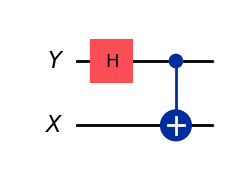

<IPython.core.display.Latex object>

In [10]:
display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

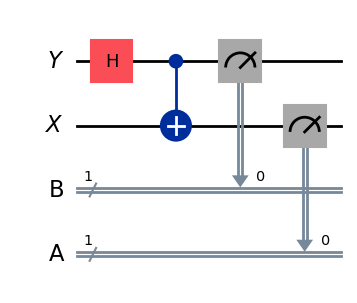

In [11]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output="mpl"))

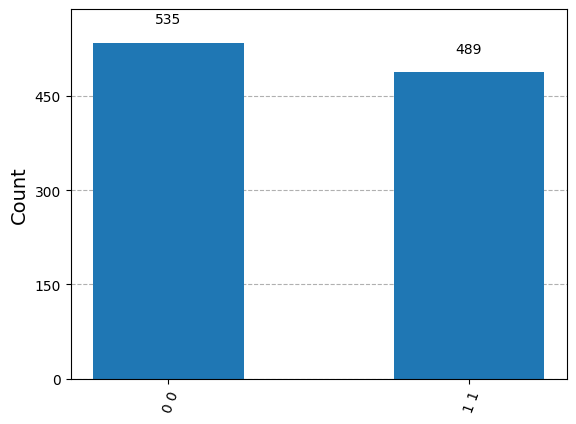

In [12]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

{'0 0': 537, '1 1': 487}


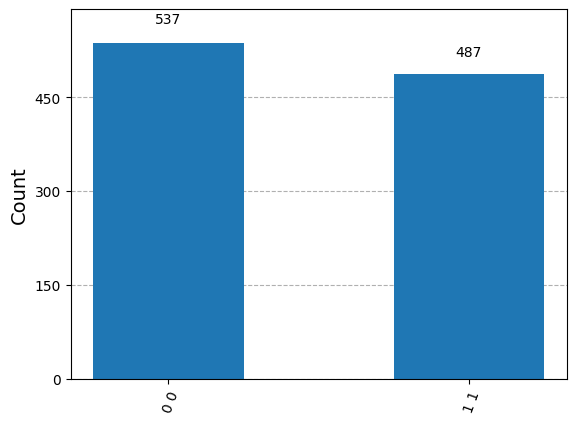

In [13]:
# Simulate
simulator = AerSimulator()
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)